# Workspace preparaation

In [12]:
# Importing packages
import numpy as np  # for matrix and data manipulation
import pandas as pd  # for DataFrames
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for more plotitng
import statsmodels.api as sm  # for statistical modelling
import scikitplot as skplt  # for scikit-learn plotting

from sklearn.preprocessing import StandardScaler  # for preprocessing & scaling
from sklearn.preprocessing import PolynomialFeatures  # for polynomial features preprocessing
from sklearn.impute import SimpleImputer   # for missing values imputation
from sklearn.model_selection import train_test_split  # train-test splits
from sklearn.model_selection import StratifiedKFold  # K-fold resampling, stratified
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.calibration import CalibratedClassifierCV  # Hyperparameter tuning with calibration
from sklearn.calibration import calibration_curve  # calibration curve plotting
from sklearn.calibration import CalibrationDisplay  # calibration curve plotting
from sklearn.metrics import confusion_matrix  # performance metrics, confusion matrix
from sklearn.metrics import classification_report  # performance matrix classifiaction report
from sklearn.metrics import roc_auc_score  # Area Under Receiver Operating Characteristics
from sklearn.metrics import roc_curve  # ROC
from sklearn.metrics import RocCurveDisplay  # ROC plotting
from sklearn.metrics import accuracy_score  # performance metric accuracy (0/1) score
from sklearn.metrics import precision_score  # performance metric
from sklearn.linear_model import LogisticRegression  # Logistic regression modelling
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification
from sklearn.ensemble import GradientBoostingClassifier  # GBM for classification
from sklearn.svm import SVC  # SVM for classification
from sklearn.utils import resample  # Resampling
from imblearn.over_sampling import SMOTE  # Synthetic upsampling

In [13]:
# Setting plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [14]:
# Jupyter magic command to show plots inline immediately
%matplotlib inline

In [15]:
# Setting seed
seed = 43
np.random.seed(seed)

# Loading the data

In [16]:
# Loading the house price dataset
data_file_path = './'  # Set to the path of folder where you can find 'train_V2.csv' and 'score.csv'

# Training data
train_V2 = pd.read_csv(data_file_path + 'train_V2.csv')
score = pd.read_csv(data_file_path + 'score.csv')
print('Training set shape: {}' .format(train_V2.shape))
print('Score set shape: {}' .format(score.shape))

#dictionary = pd.read_csv(data_file_path + 'dictionary.csv')
#print('Dictionary set shape: {}' .format(score.shape))

Training set shape: (5000, 53)
Score set shape: (500, 50)


In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#print(train_V2.columns.tolist())
for col in score.columns.tolist():
    print(col)


income_am
profit_last_am
profit_am
damage_am
damage_inc
crd_lim_rec
credit_use_ic
gluten_ic
lactose_ic
insurance_ic
spa_ic
empl_ic
cab_requests
married_cd
bar_no
sport_ic
neighbor_income
age
marketing_permit
urban_ic
dining_ic
presidential
client_segment
sect_empl
prev_stay
prev_all_in_stay
divorce
fam_adult_size
children_no
tenure_mts
tenure_yrs
company_ic
claims_no
claims_am
nights_booked
gender
shop_am
shop_use
retired
gold_status
score1_pos
score1_neg
score2_pos
score2_neg
score3_pos
score3_neg
score4_pos
score4_neg
score5_pos
score5_neg


In [18]:
# Setting 'Id' columns as index
train_V2.insert(0, 'Id', range(0, 0 + len(train_V2)))
if 'Id' in train_V2.columns:
    train_V2 = train_V2.set_index('Id')

In [19]:
# The outcome to maximize is profit - damage
train_V2['profit-damage'] = train_V2['outcome_profit'] - train_V2['outcome_damage_amount']

In [9]:
train_V2[train_V2['outcome_damage_inc']==1].head()
#train_V2.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount,Profit-Damage
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66,843.12
6,13293.0,28.0,14704.0,0.0,0.0,15000.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0,True,18.0,0.0,33459.0,46.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,3.0,2.0,324.0,27.0,0.0,0.0,0.0,82.0,M,0.0,0.0,0.0,1.0,0.566906,0.846320,0.595743,0.901703,NaN,NaN,NaN,NaN,NaN,NaN,1676.75,1,888.09,788.66
9,229.0,810.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,True,6.0,0.0,31718.0,29.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,145.0,12.0,0.0,0.0,0.0,4.0,M,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.196373,0.318601,NaN,NaN,NaN,NaN,1861.78,1,981.64,880.14
10,7177.0,2887.0,3770.0,0.0,0.0,15000.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,True,11.0,0.0,34575.0,53.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,167.0,14.0,0.0,0.0,0.0,19.0,V,0.0,0.0,0.0,0.0,NaN,NaN,0.222590,0.130548,NaN,NaN,0.276508,0.882461,NaN,NaN,1761.14,1,483.05,1278.09
11,3240.0,1212.0,2750.0,2762.0,6.0,12000.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,True,9.0,1.0,31135.0,53.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,477.0,40.0,0.0,0.0,0.0,13.0,V,0.0,0.0,0.0,0.0,0.390233,0.526528,NaN,NaN,NaN,NaN,0.044849,0.649934,NaN,NaN,2109.04,1,1046.70,1062.34


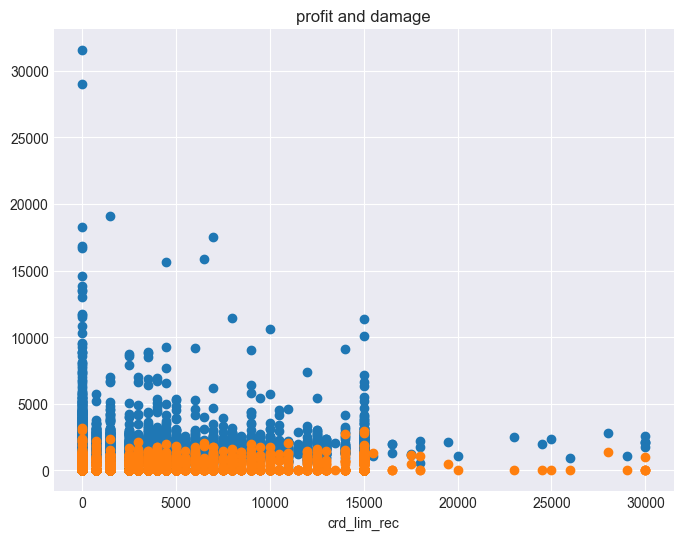

In [10]:
# Plotting
x = 'crd_lim_rec'
plt.figure(figsize=(8, 6))
plt.scatter(x=train_V2[x], y=train_V2['outcome_profit']);
plt.scatter(x=train_V2[x], y=train_V2['outcome_damage_amount']);
plt.title('profit and damage');
plt.xlabel(x);

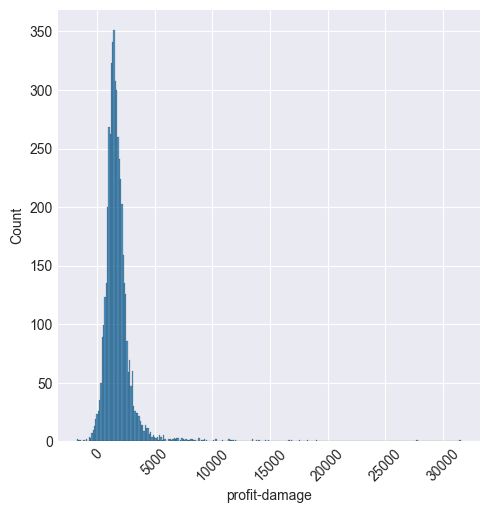

In [20]:
# Checking univariate distribution of the sales price
sns.displot(train_V2['profit-damage']);  # With seaborn for a change
plt.xticks(rotation=45); # Rotating x labels

# plt alternative
#plt.hist(train_V2['outcome_profit']);

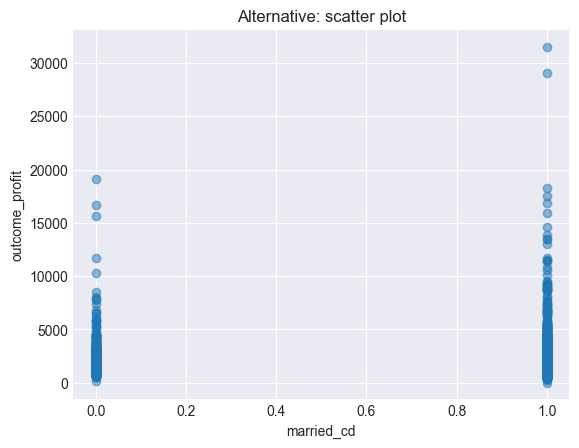

In [21]:
# But I guess a scatter plot would've done well also

x='married_cd'
plt.scatter(x=train_V2[x], y=train_V2['outcome_profit'], alpha=0.5);  # alpha=0.5 makes it a bit see through
plt.xlabel(x);
plt.ylabel('outcome_profit');
plt.title('Alternative: scatter plot');
plt.show() 


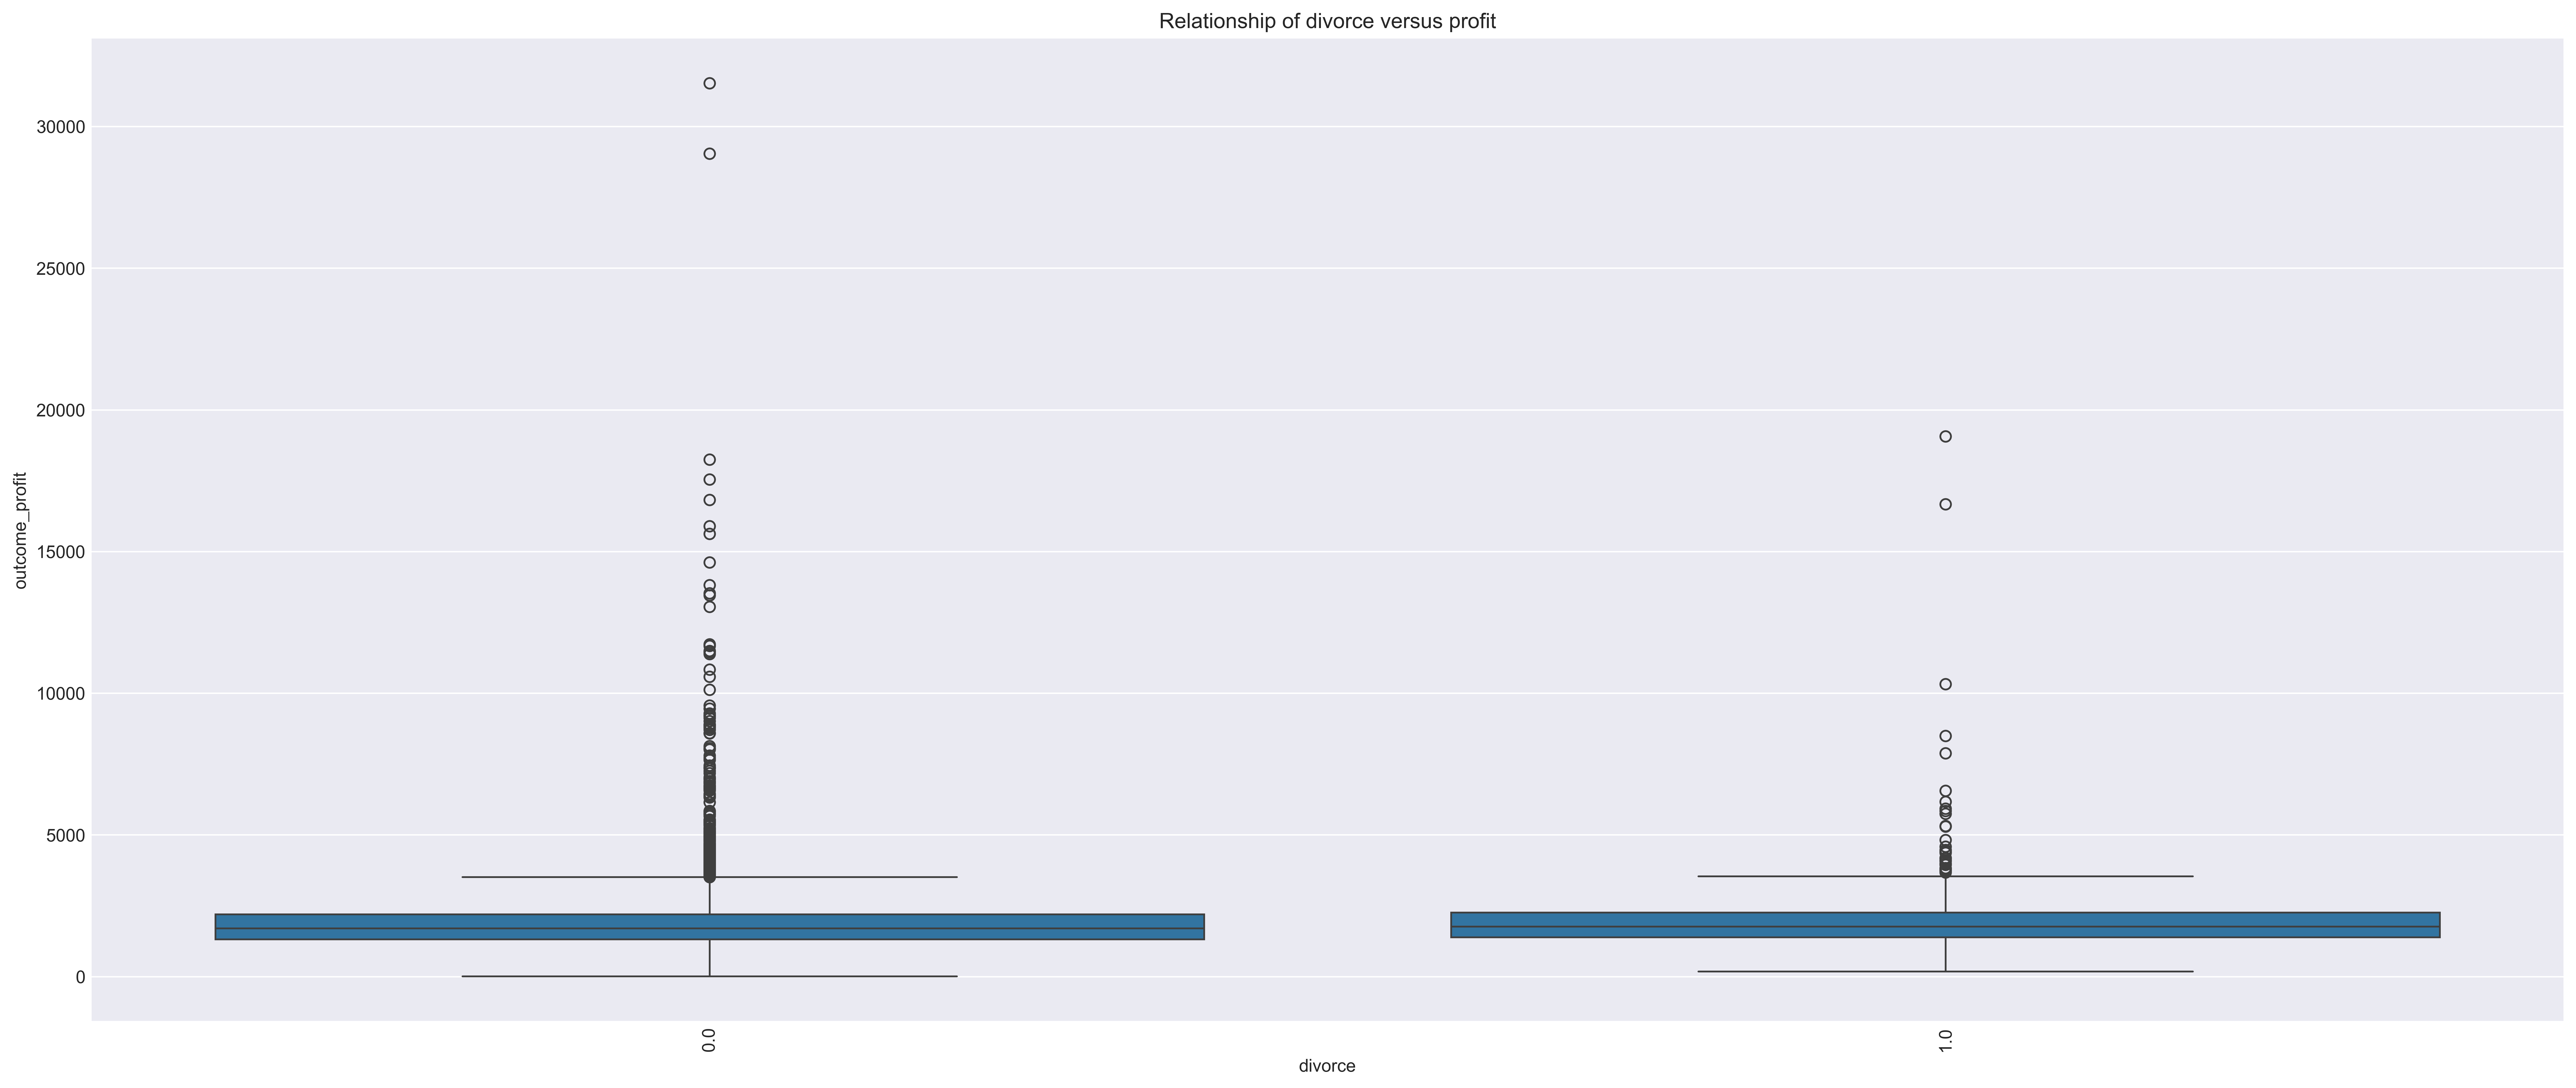

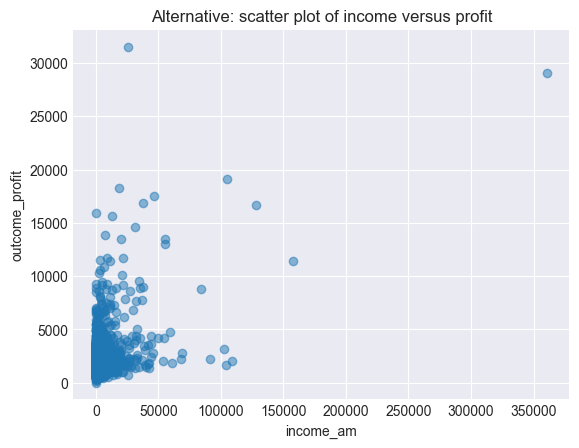

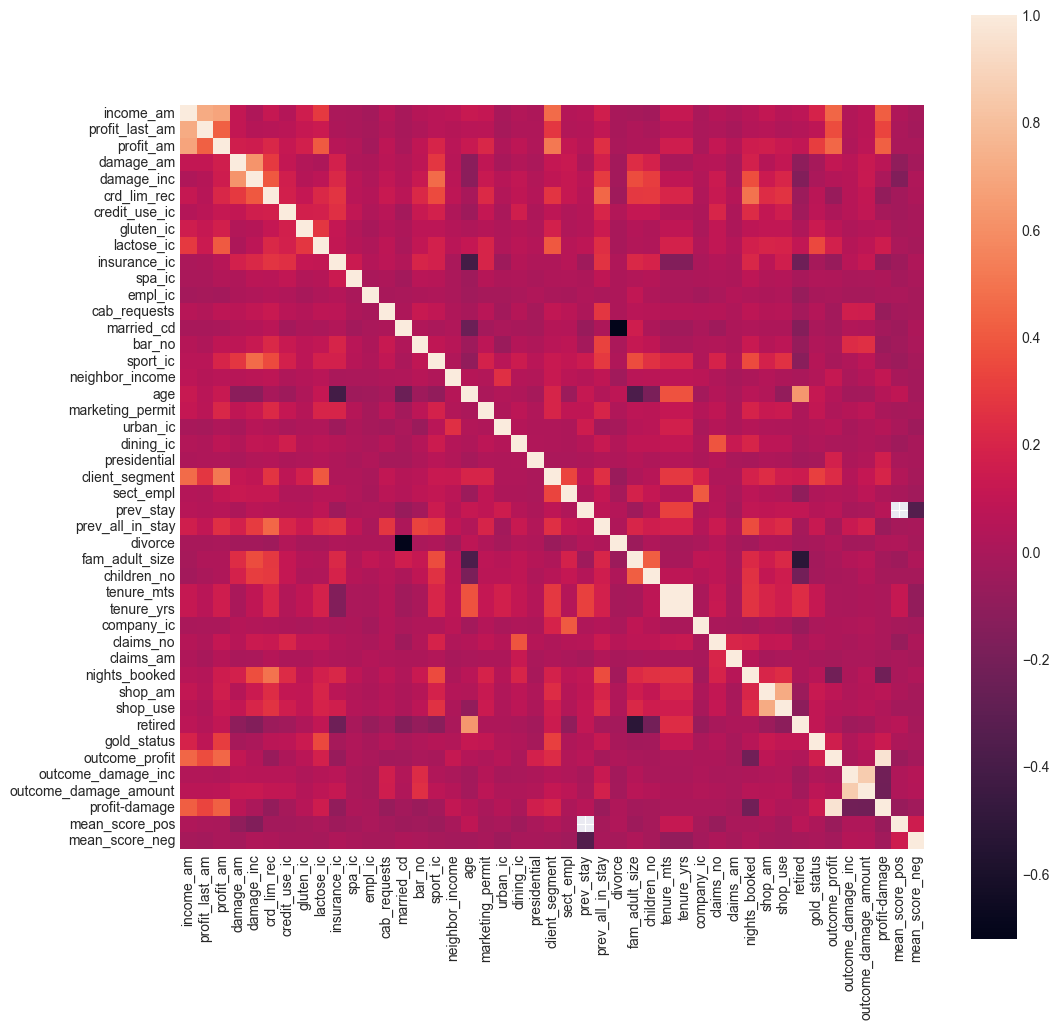

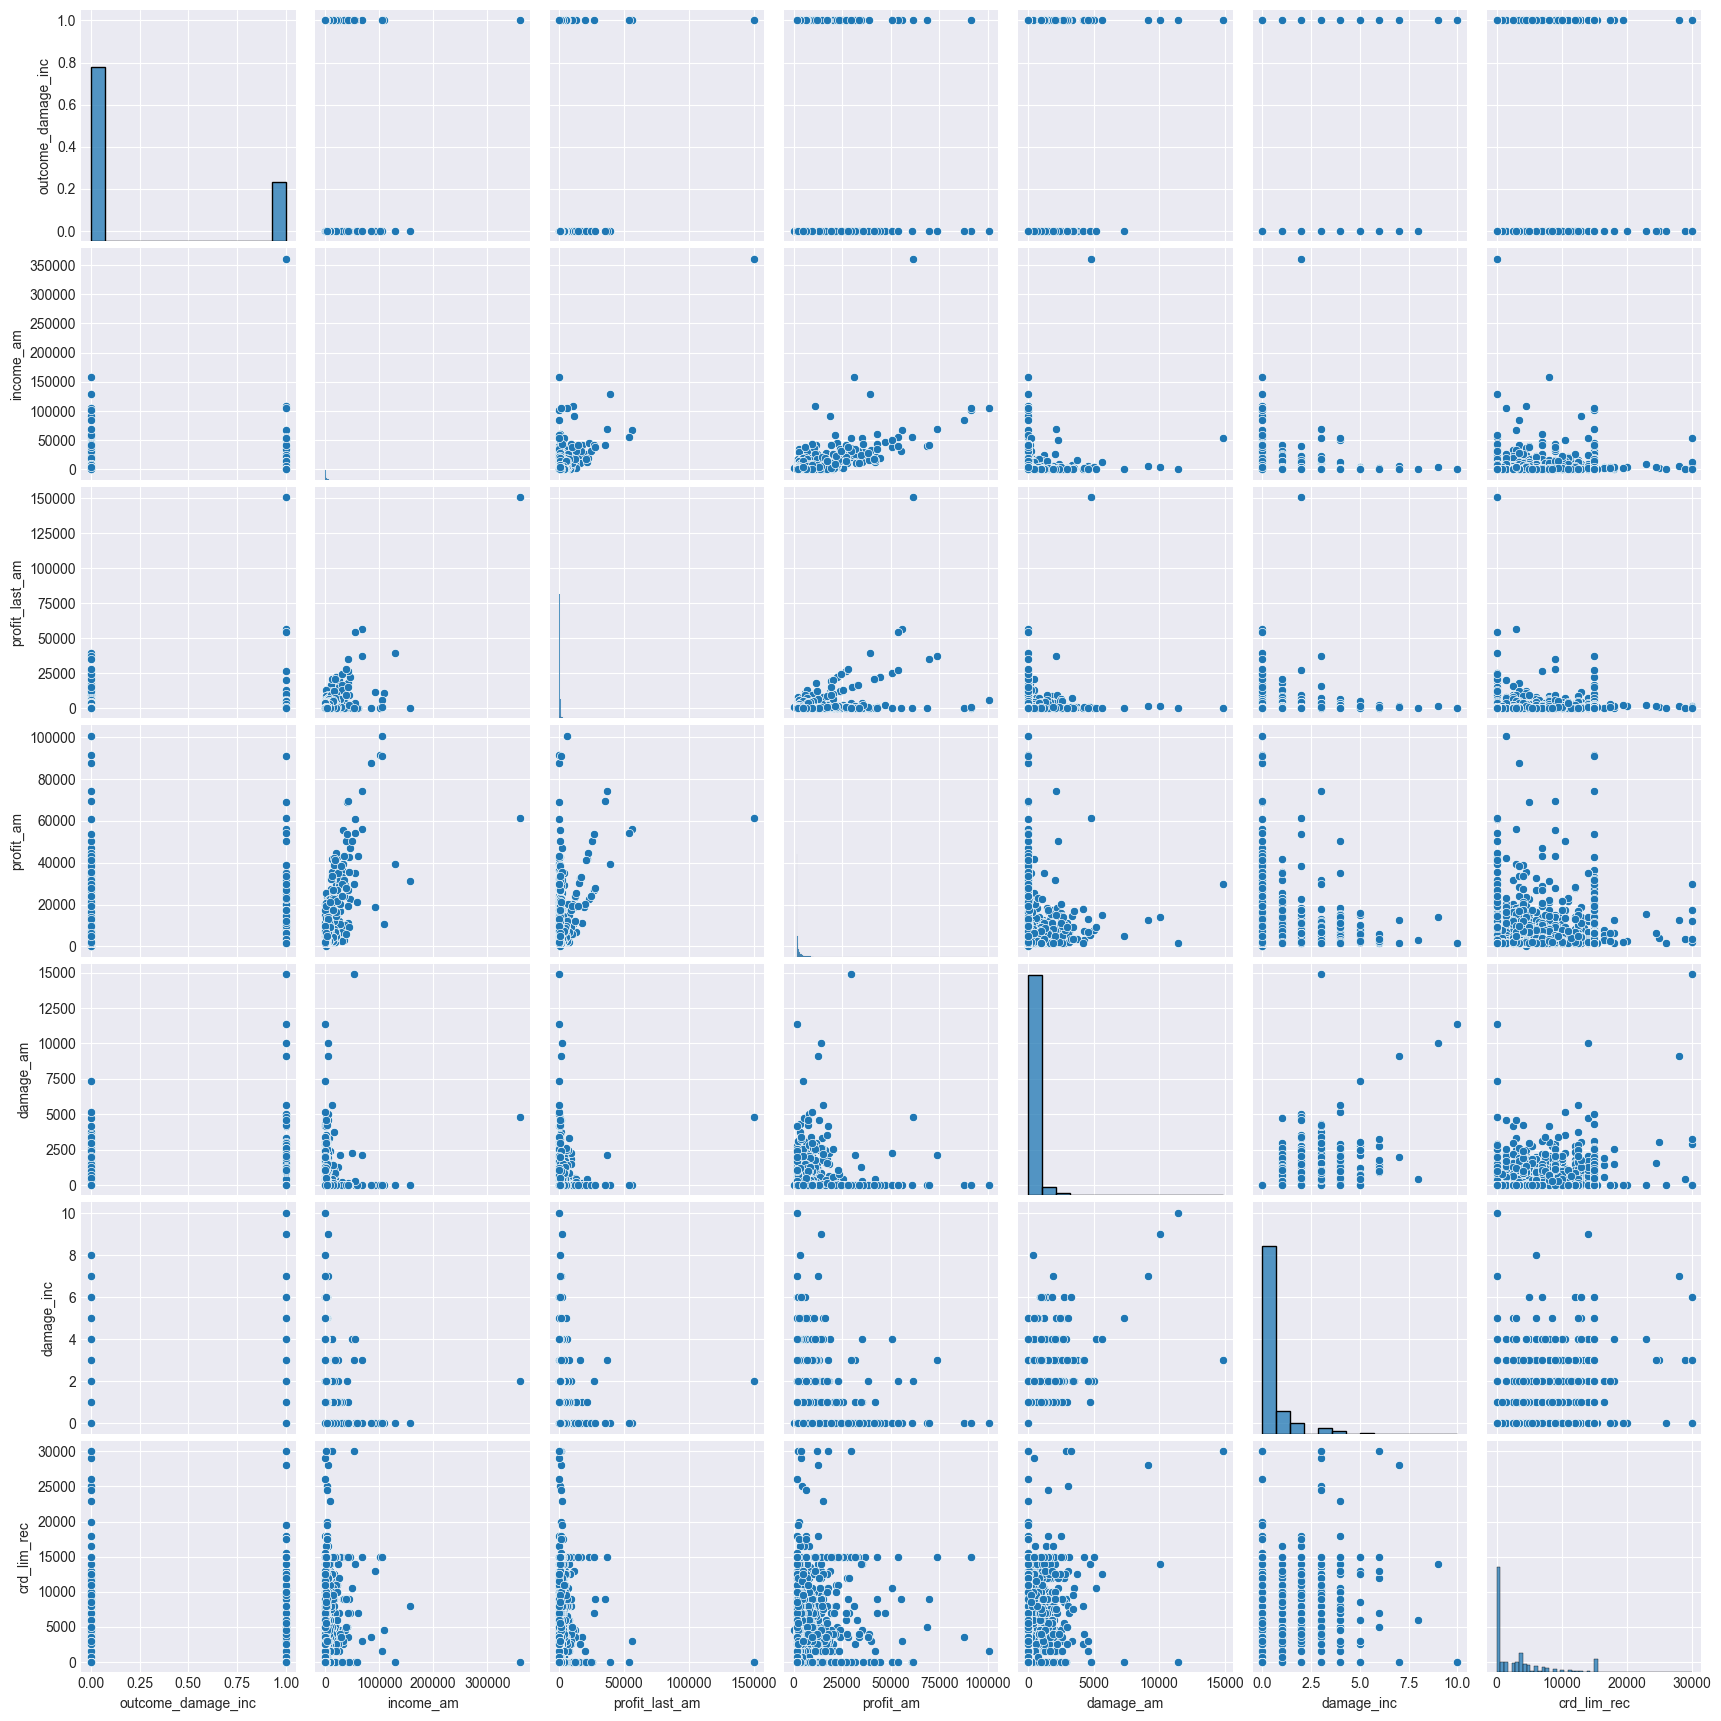

# Handle missing data
1. Getting missing values descending per feature
2. Drop features with more than 15% missing values
3. Find instances with missing observations (% of missing for a lot of features is equal > it appears these values for these featues are missing for the same instances)

In [40]:
#train_V2.insert(train_V2.shape[1],'score_pos','NaN')
#train_V2.insert(train_V2.shape[1],'score_neg','NaN')
train_V2.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,mean_score_pos,mean_score_neg
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,1791.66,0,0.00,0.652958,0.532814
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,1672.78,1,829.66,NaN,7.955259
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,1001.40,0,0.00,0.167165,0.921274
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,1785.59,0,0.00,NaN,0.889793
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,3140.74,0,0.00,0.410495,0.654370


In [23]:
# Calculate mean value for positive or negative score and add to dataframe
score_pos_features = ['score1_pos','score2_pos','score3_pos','score4_pos','score5_pos']
score_neg_features = ['score1_neg','score2_neg','score3_neg','score4_neg','score5_neg']
data_score_neg = []
data_score_pos = []

for i in range(0, 0 + len(train_V2)):
    score_neg = 0
    score_pos = 0
    nbr_score_neg = 0
    nbr_score_pos = 0
    for score in score_pos_features:
        if not(pd.isnull(train_V2.loc[i,score])):
            score_pos += train_V2.loc[i,score]
            nbr_score_pos += 1
    for score in score_neg_features:
        if not(pd.isnull(train_V2.loc[i,score])):
            score_neg += train_V2.loc[i,score]
            nbr_score_neg += 1
    if nbr_score_neg != 0:
        data_score_neg.append(score_neg / nbr_score_neg)
    else:
        data_score_neg.append(np.nan)
    if nbr_score_pos != 0:
        data_score_pos.append(score_pos / nbr_score_pos)
    else:
        data_score_pos.append(np.nan)
train_V2.insert(train_V2.shape[1], 'mean_score_pos',  data_score_pos)
train_V2.insert(train_V2.shape[1], 'mean_score_neg',  data_score_neg)


In [24]:
# Getting an idea about total missing values
total_missings = train_V2.isnull().sum().sort_values(ascending=False)  # total missng values, sorted
total_missings.head(20)  # Show top 20 most missing features

# Getting an idea about percentage missing values
pct_missings = train_V2.isnull().mean().sort_values(ascending=False)  # average (%) missng values, sorted
pct_missings.head(20)  # Show top 20 most missing features

score2_pos         0.7582
score4_pos         0.7554
score1_pos         0.7550
score5_pos         0.7536
score3_pos         0.7478
score2_neg         0.7392
score1_neg         0.7372
score4_neg         0.7352
score3_neg         0.7266
score5_neg         0.7014
mean_score_pos     0.3194
mean_score_neg     0.2332
tenure_yrs         0.0784
tenure_mts         0.0784
neighbor_income    0.0478
cab_requests       0.0176
shop_use           0.0176
dining_ic          0.0176
presidential       0.0176
profit_last_am     0.0106
dtype: float64

In [25]:
# Remove the features missing mor tha 15% (score*_pos, neg)
print(f"Shape of train_V2 BEFORE dropping missing features: {train_V2.shape}")
missing_a_lot = pct_missings[pct_missings > 0.35].index  # we take from all variables those missing most, and take the row-idx
print(f"Columns missing more than 15% :{missing_a_lot}")
train_V2 = train_V2.drop(missing_a_lot, axis=1)
print(f"Shape of train_V2 AFTER dropping missing features: {train_V2.shape}")

Shape of train_V2 BEFORE dropping missing features: (5000, 56)
Columns missing more than 15% :Index(['score2_pos', 'score4_pos', 'score1_pos', 'score5_pos', 'score3_pos',
       'score2_neg', 'score1_neg', 'score4_neg', 'score3_neg', 'score5_neg'],
      dtype='object')
Shape of train_V2 AFTER dropping missing features: (5000, 46)


In [42]:
#For a number of instances (53) data seems to be missing for a list of features. These will be eliminated from the dataset
missing_data = train_V2[train_V2['prev_stay'].isnull()]
#missing_data.to_csv('missing_data.csv')
print(missing_data.index)
train_V2 = train_V2.drop(missing_data.index)

Index([], dtype='int64', name='Id')


In [43]:
# Total amount of missings
total_total_missings = train_V2.isnull().sum().sum()
print(f'Are there any missings at all anymore, if this is zero, there are none: {total_total_missings}')
# YAY!

Are there any missings at all anymore, if this is zero, there are none: 3661


## Impute missing data
## ***

In [38]:
numeric_cols=[]
non_numeric_cols=[]
for col in train_V2.columns.tolist():
    if col[-2:] == 'am':
        numeric_cols.append(col)
    else:
        non_numeric_cols.append(col)

#non_numeric_cols = train_V2.select_dtypes(exclude='number').columns
print(non_numeric_cols)
train_V2[non_numeric_cols].head()

# Checking frequency table of a feature (xxx)
for col in non_numeric_cols:
    #print(col)
    print(col,f'y_train frequency table:  \n{train_V2[col].value_counts()}')

['damage_inc', 'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic', 'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd', 'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit', 'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl', 'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size', 'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no', 'nights_booked', 'gender', 'shop_use', 'retired', 'gold_status', 'outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']


,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,nights_booked,gender,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,209.0,M,0.0,0.0,0.0,1791.66,0,0.00
1,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,4.0,M,0.0,0.0,0.0,1672.78,1,829.66
2,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,6.0,M,0.0,0.0,0.0,1001.40,0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,4.0,V,0.0,0.0,0.0,1785.59,0,0.00
4,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,3.0,V,1.0,0.0,0.0,3140.74,0,0.00


# Visualizing / Exploring data

In [ ]:
# Boxplot-type for year built vs SalePrice
plt.figure(figsize=(25, 10), dpi=500)  # Bumping up image size and DPI for better viewing
sns.boxplot(x='divorce', y='outcome_profit', data=train_V2);
plt.xticks(rotation=90);  # To rotate x-axis labels
plt.title('Relationship of divorce versus profit');
plt.show()  # remember: necessary to do this when trying to plot multiple plots from a single cell!

# But I guess a scatter plot would've done well also
plt.scatter(x=train_V2['income_am'], y=train_V2['outcome_profit'], alpha=0.5);  # alpha=0.5 makes it a bit see through
plt.xlabel('income_am');
plt.ylabel('outcome_profit');
plt.title('Alternative: scatter plot of income versus profit');
plt.show() 

# Correlation matrix between features
corrmat = train_V2.corr(numeric_only=True)  # Since Pandas 2.0 you need to supply this attribute
plt.figure(figsize=(12, 12));
sns.heatmap(corrmat, vmax=1, square=True);
# Note, we keep SalePrice in here as well, proceed with caution (no data snooping!)

# Scatterplot matrix (might take a while)
plot_cols = ['outcome_damage_inc', 'income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc', 'crd_lim_rec']
sns.pairplot(train_V2[plot_cols], height=2.5);

# Standardizing / train_test_split

In [ ]:
# Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
train_v2_stan_df = scaler.fit_transform(X=train_V2)


# Making train-test set split (Note: we're taking 30% test set size here instead of 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_v2_stan_df.drop('outcome_profit','outcome_damage_inc','outcome_damage_amount','profit-damage', axis=1), # features DF
                                                    train_v2_stan_df['Expensive'],   # target DF/series
                                                    test_size=0.3, # 30% as test or validation set (who cares about the exact names)
                                                    shuffle=True,  # This shuffles the data! (Important)
                                                    random_state=seed)  # setting seed for consistent results

# I'll also make standardized (normalized) versions
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(X=X_train)
X_train_norm = scaler.transform(X=X_train)
X_test_norm = scaler.transform(X=X_test)